<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/LectureNotebooks/FEDS_lecture_07_Windrose_dew_point_wind_chill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Windrose, dew point and wind chill

### Aims of the Lecture:

* Work with meteorological data
* Create wind roses
* Calculate dew point
* Calculate wind chill

In [2]:
pip install windrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import numpy
import pandas

In [4]:
# create a time series of wind velocity and wind direction
# ws: wind speed
# wd: wind direction
ws = numpy.array([5,5,10,10]) # m/s
wd = numpy.array([0,0,90,90]) # angle in degrees

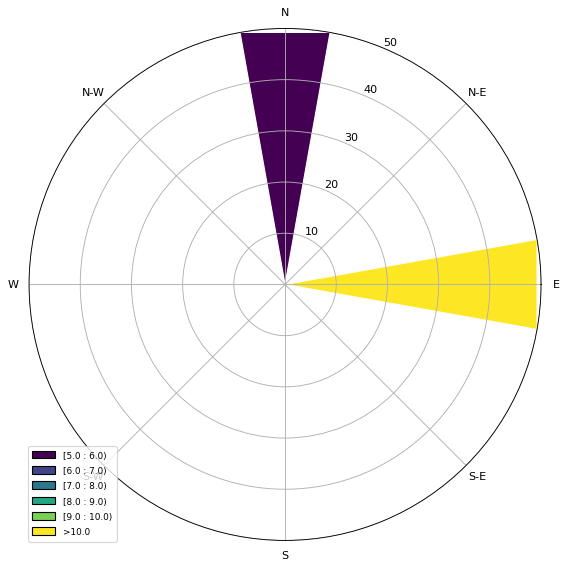

In [12]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd,ws,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

In [13]:
ws2 = numpy.array([5,7,8,10]) # m/s
wd2 = numpy.array([270,180,180,180]) # angle in degrees

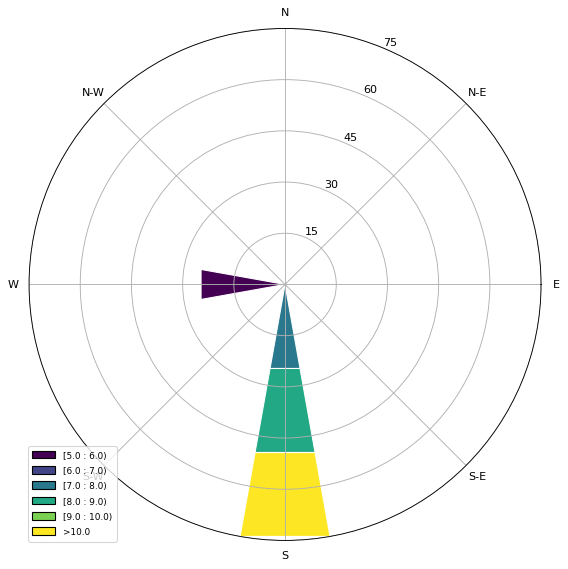

In [14]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd2,ws2,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

# Generate random numbers from [0,1.0)

* numpy.random.random()
* numpy.random.vonmises()

In [17]:
numpy.random.random(1)

array([0.0870276])

In [20]:
numpy.random.random?

In [18]:
ws = numpy.random.random(3000)*6
wd = numpy.random.random(3000)*360

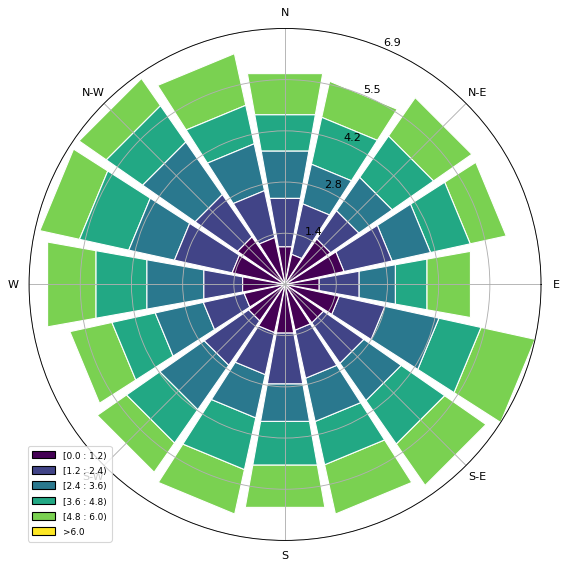

In [19]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd,ws,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

In [21]:
numpy.random.vonmises?

In [22]:
ws = numpy.random.vonmises(0,3.14,3000)*6
wd = numpy.random.vonmises(0,3.14,3000)*360

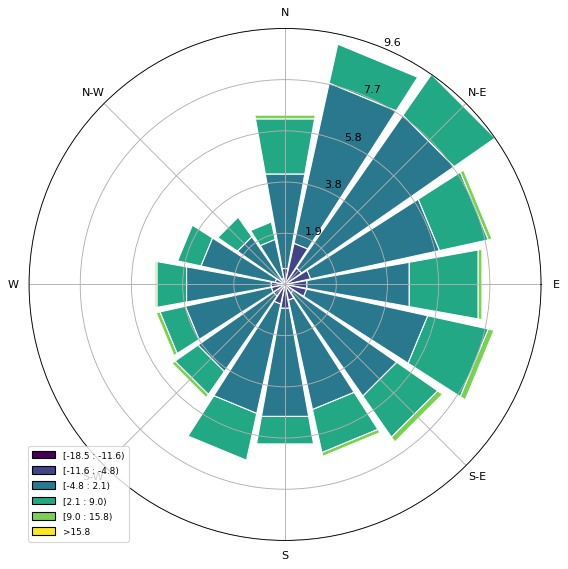

In [23]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd,ws,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

In [24]:
# Data from Brazil
! gdown --id 1_MG88ST4Ylji8bwlE0pobT--HIYQRLDe

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_MG88ST4Ylji8bwlE0pobT--HIYQRLDe
To: /content/meteo.csv
100% 486k/486k [00:00<00:00, 135MB/s]


In [26]:
data = pandas.read_csv('meteo.csv',sep=';')
data[0:2]

,NO.,Time,Interval,Indoor Temperature(oC),Indoor Humidity(%),Outdoor Temperature(oC),Outdoor Humidity(%),Relative Pressure(hpa),Absolute Pressure(hpa),Wind Speed(m/s),Gust(m/s),Wind Direction,DewPoint(oC),WindChill(oC),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
0,1,22/11/2018 23:17:47,5,22.7,72,20.3,87,1009.6,905.6,4.1,5.8,SE,18.1,17.7,0.0,0.0,0.0,0.0,0.0
1,2,22/11/2018 23:22:47,5,22.6,73,20.3,87,1009.6,905.6,3.1,4.1,SE,18.1,18.5,0.0,0.0,0.0,0.0,0.0


In [29]:
data[-3:-1]

,NO.,Time,Interval,Indoor Temperature(oC),Indoor Humidity(%),Outdoor Temperature(oC),Outdoor Humidity(%),Relative Pressure(hpa),Absolute Pressure(hpa),Wind Speed(m/s),Gust(m/s),Wind Direction,DewPoint(oC),WindChill(oC),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
4117,4118,07/12/2018 06:58:47,5,20.2,67,15.8,91,1011.1,907.1,2.4,3.1,SE,14.4,14.3,0.0,0.0,0.0,0.3,40.5
4118,4119,07/12/2018 07:03:47,5,20.0,68,15.6,92,1011.0,907.0,2.4,2.7,S,14.3,14.1,0.0,0.0,0.0,0.3,40.5


In [28]:
ws = data['Wind Speed(m/s)'].values
print(len(ws))
ws

4120


array([4.1, 3.1, 2.7, ..., 2.4, 2.4, 0.7])

In [34]:
wd = data['Wind Direction']
wd

0        SE
1        SE
2         E
3         E
4         N
       ... 
4115      S
4116      S
4117     SE
4118      S
4119     SE
Name: Wind Direction, Length: 4120, dtype: object

In [37]:
wd_graus = wd.copy()

In [38]:
wd_graus.unique()

array([' SE', ' E', ' N', ' ENE', ' NE', ' NNE', ' S', ' NNW', ' W',
       ' WSW', ' ESE', ' NW', ' WNW', ' SW', ' ---', ' SSW', ' SSE'],
      dtype=object)

In [39]:
wd_graus = wd_graus.replace({' N'  :  0})
wd_graus = wd_graus.replace({' NE':  45})
wd_graus = wd_graus.replace({' E'  : 90})
wd_graus = wd_graus.replace({' SE': 135})
wd_graus = wd_graus.replace({' S' : 180})
wd_graus = wd_graus.replace({' SW': 225})
wd_graus = wd_graus.replace({' W' : 270})
wd_graus = wd_graus.replace({' NW': 315})

wd_graus = wd_graus.replace({' ENE'  :  67.5})
wd_graus = wd_graus.replace({' NNE'  :  22.5})
wd_graus = wd_graus.replace({' NNW'  :  337.5})
wd_graus = wd_graus.replace({' WSW'  :  247.5})
wd_graus = wd_graus.replace({' ESE'  :  112.5})
wd_graus = wd_graus.replace({' WNW'  :  292.5})
wd_graus = wd_graus.replace({' SSW'  :  202.5})
wd_graus = wd_graus.replace({' SSE'  :  157.5})

In [41]:
wd_graus = wd_graus.replace({' ---'  :  numpy.nan})

In [42]:
wd_graus.unique()

array([135. ,  90. ,   0. ,  67.5,  45. ,  22.5, 180. , 337.5, 270. ,
       247.5, 112.5, 315. , 292.5, 225. ,   nan, 202.5, 157.5])

In [43]:
new_df = pandas.DataFrame({'ws (m/s)': ws, 'wd (degrees)': wd_graus})

In [46]:
new_df[0:2]

,ws (m/s),wd (degrees)
0,4.1,135.0
1,3.1,135.0


In [47]:
df = new_df.dropna()

In [48]:
print(len(new_df),len(df))

4120 4116


In [49]:
ws = df['ws (m/s)'].values
wd = df['wd (degrees)'].values

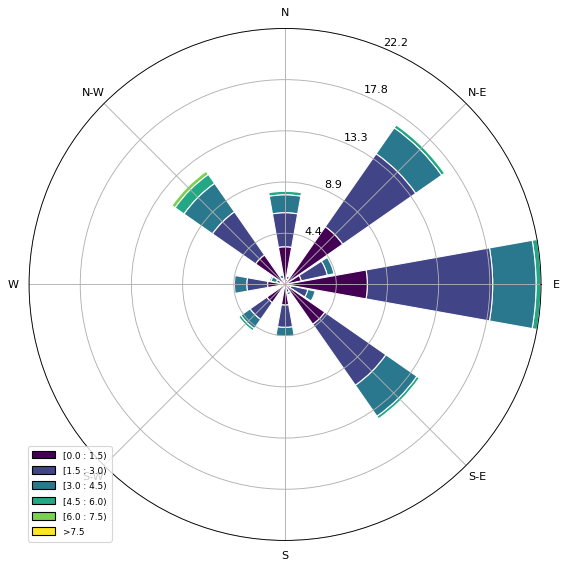

In [55]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd,ws,nsector=16,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

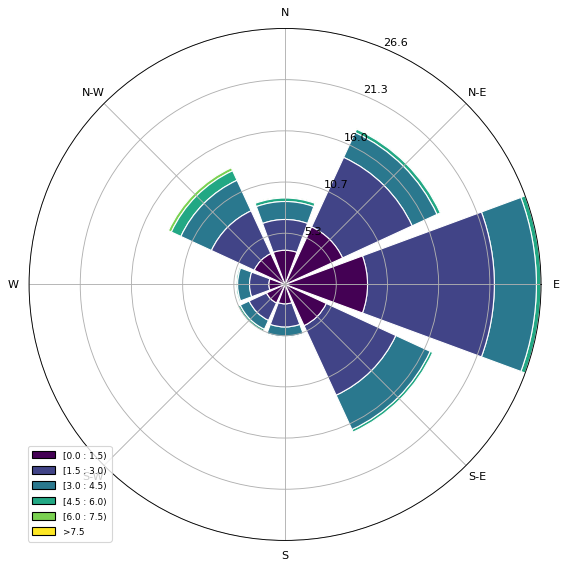

In [59]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd,ws,nsector=8,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

## Dew Point Temperature

$
T_{dp} \approx T - \frac{100 - \text{RH}}{5}
$



In [60]:
T = data['Outdoor Temperature(oC)'].values
RH = data['Outdoor Humidity(%)'].values

In [61]:
TDP = T - (100-RH)/5
TDP

array([17.7, 17.7, 17.9, ..., 14. , 14. , 14.1])

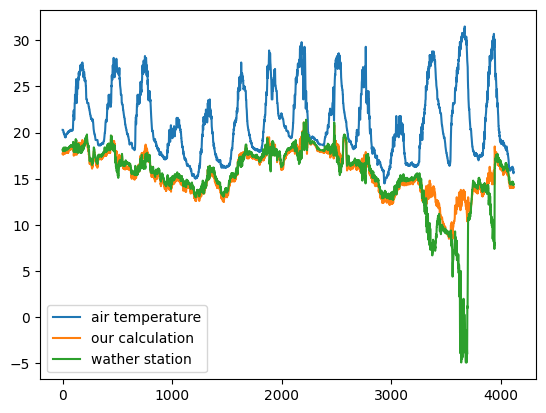

In [66]:
plt.plot(data['Outdoor Temperature(oC)'], label='air temperature')
plt.plot(TDP, label='our calculation')
plt.plot(data['DewPoint(oC)'], label='weather station')
plt.legend();

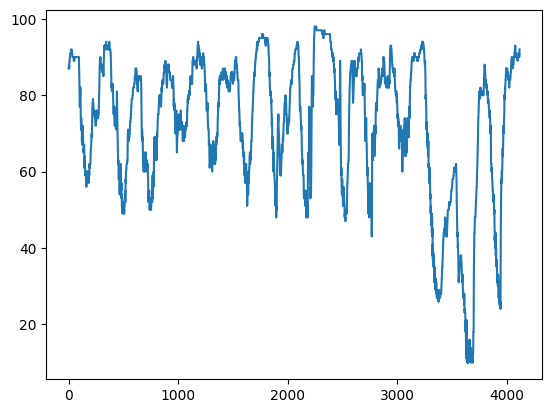

In [68]:
plt.plot(data['Outdoor Humidity(%)'], label='RH')

###  Wind Chill

1) Original Model

$ \text{WCI}=\left(10\sqrt{v}-v+10.5\right) \cdot \left(33-T_\mathrm{a}\right)$

where:
* $\text{WCI}$ = wind chill index (sensação térmica), kg*cal/m<sup>2</sup>/h
* $v$ =  wind velocity, m/s
* $T_\mathrm{a}$ = air temperature, °C

2) North American and United Kingdom wind chill index

$T_\mathrm{wc}=13.12 + 0.6215 T_\mathrm{a}-11.37 v^{+0.16} + 0.3965 T_\mathrm{a} v^{+0.16}$

where Twc is the wind chill index, based on the Celsius temperature scale; Ta is the air temperature in degrees Celsius; and v is the wind speed at 10 m (33 ft) standard anemometer height, in kilometres per hour

* https://en.wikipedia.org/wiki/Wind_chill
* https://doi.org/10.1175/BAMS-86-10-1453



In [69]:
ws = data['Wind Speed(m/s)'].values
T = data['Outdoor Temperature(oC)'].values

In [70]:
TWC = 13.12+0.6215*T-11.37*ws**(0.16)+0.3965*ws**(0.16)

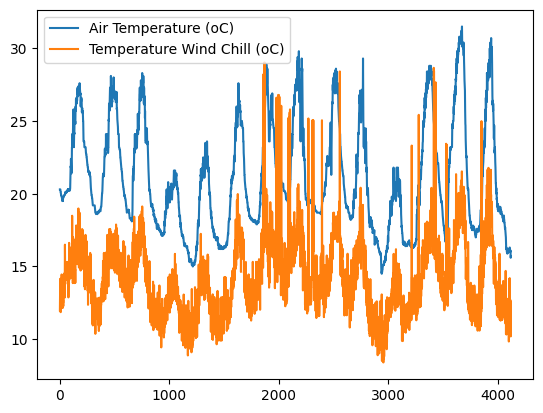

In [71]:
plt.plot(T,label='Air Temperature (oC)')
plt.plot(TWC,label='Temperature Wind Chill (oC)')
plt.legend();